In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

In [ ]:
##Extracting Data from tar file
# import tarfile
# with tarfile.open('../data/yelp_dataset.tar', 'r') as tar:
#     tar.extractall()

Reading .json files

## 1. Business Information
    Contains:
        ** business_id **
        name
        address, city, state, zipcode, lat/long
        review_count
        is_open
        atrributes(appointment only, accepts credit cards etc...)
        categories
        hours

In [2]:
business_json_path = '../data/yelp_academic_dataset_business.json'
df_b = pd.read_json(business_json_path, lines=True)
df_b

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


### Filtering businesses only to state = TN

In [3]:
#checking state names are standard
df_b['state'].unique()

array(['CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV', 'ID',
       'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

In [4]:
df_b_TN = df_b[df_b['state'] == 'TN']

In [5]:
df_b_TN.shape

(12056, 14)

In [6]:
df_b_TN['city'].value_counts().head(40)

Nashville                                               6968
Franklin                                                1410
Brentwood                                                644
Hendersonville                                           484
Smyrna                                                   365
Mount Juliet                                             280
Madison                                                  272
Hermitage                                                267
Antioch                                                  231
Goodlettsville                                           201
Gallatin                                                 151
Nolensville                                               93
La Vergne                                                 88
Old Hickory                                               84
Mt. Juliet                                                78
White House                                               74
Springfield             

#### Filter for Nashville

In [21]:
df_b_TN[df_b_TN['city'].str.contains('nashville', case = False)]['city'].unique()

array(['Nashville'], dtype=object)

In [15]:
df_b_TN = df_b_TN[df_b_TN['city'].str.contains('nashville', case = False)]

In [20]:
df_b_TN['city'] = 'Nashville'

C:\Users\16156\AppData\Local\Temp\ipykernel_14068\2967141846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_TN['city'] = 'Nashville'


#### checking for business category

In [25]:
df_b_TN['categories'].value_counts()

Restaurants, Mexican                                                                                                       44
Mexican, Restaurants                                                                                                       35
Beauty & Spas, Nail Salons                                                                                                 35
Nail Salons, Beauty & Spas                                                                                                 28
Hotels & Travel, Event Planning & Services, Hotels                                                                         28
                                                                                                                           ..
Doctors, Health & Medical, Occupational Therapy, Family Practice, Urgent Care                                               1
Professional Services, Software Development, Shopping, Computers                                                      

In [32]:
df_b_TN = df_b_TN[df_b_TN['categories'].str.contains('restaurants', case = False, na = False)]

In [34]:
df_b_TN['categories'].value_counts().head(30)

Restaurants, Mexican                   44
Mexican, Restaurants                   35
Pizza, Restaurants                     23
Restaurants, Pizza                     18
American (New), Restaurants            18
Barbeque, Restaurants                  18
Chinese, Restaurants                   18
Restaurants, Chinese                   15
Restaurants, American (New)            14
American (Traditional), Restaurants    11
Southern, Restaurants                  10
Restaurants, American (Traditional)    10
Sandwiches, Restaurants, Fast Food      9
Restaurants, Fast Food, Burgers         9
Vietnamese, Restaurants                 9
Restaurants, Sandwiches, Fast Food      8
Restaurants, Sandwiches                 8
Burgers, Restaurants                    8
Burgers, Restaurants, Fast Food         8
Restaurants, Burgers, Fast Food         8
Burgers, Fast Food, Restaurants         7
Thai, Restaurants                       7
Chicken Wings, Restaurants              7
Restaurants, Barbeque             

#### Standardizing restaurant categories

In [37]:
#new column that removes redundant 'restaurant'
df_b_TN['clean_cat'] = df_b_TN['categories'].str.replace('Restaurants, ', '').str.replace(', Restaurants', '')

#if multiple categories, sort alphabetically
df_b_TN['clean_cat'] = df_b_TN['clean_cat'].str.split(', ')  
df_b_TN['clean_cat'] = df_b_TN['clean_cat'].apply(lambda x: ', '.join(sorted(x)))

C:\Users\16156\AppData\Local\Temp\ipykernel_14068\1282340472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b_TN['clean_cat'] = df_b_TN['categories'].str.replace('Restaurants, ', '').str.replace(', Restaurants', '')


In [43]:
df_b_TN['clean_cat'].value_counts().head(40)

Mexican                                                               79
Burgers, Fast Food                                                    42
Pizza                                                                 41
Chinese                                                               33
American (New)                                                        32
Fast Food, Sandwiches                                                 28
Barbeque                                                              25
American (Traditional)                                                21
Burgers, Coffee & Tea, Fast Food, Food                                19
Greek, Mediterranean                                                  16
Italian, Pizza                                                        16
Delis, Fast Food, Sandwiches                                          16
Japanese, Sushi Bars                                                  15
Southern                                           

In [44]:
df_b_TN.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,clean_cat
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...","Burgers, Fast Food, Food, Ice Cream & Frozen Y..."
24,4iRzR7OaS-QaSXuvYxEGKA,Super Dog,1160 Gallatin Pike S,Nashville,TN,37115,36.248570,-86.719986,4.0,6,0,"{'RestaurantsReservations': 'False', 'Restaura...","Hot Dogs, Restaurants",None,Hot Dogs
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","Restaurants, Japanese, Seafood","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2...","Japanese, Seafood"
47,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,TN,37203,36.148371,-86.798895,3.5,159,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...","American (Traditional), Bars, Breakfast & Brun..."
89,oaboaRBUgGjbo2kfUIKDLQ,Mike's Ice Cream,129 2nd Ave N,Nashville,TN,37201,36.162649,-86.775973,4.5,593,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForK...","Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...","{'Monday': '8:0-23:0', 'Tuesday': '8:0-23:0', ...","Coffee & Tea, Food, Ice Cream & Frozen Yogurt,..."


In [45]:
df_b_TN['business_id'].nunique()

2509

In [46]:
df_b_TN['clean_cat'].nunique()

1607

### Summary: in df_b_TN dataset:
- there are 2,509 restaurants in Nashville, with 1,607 different restuarant categories

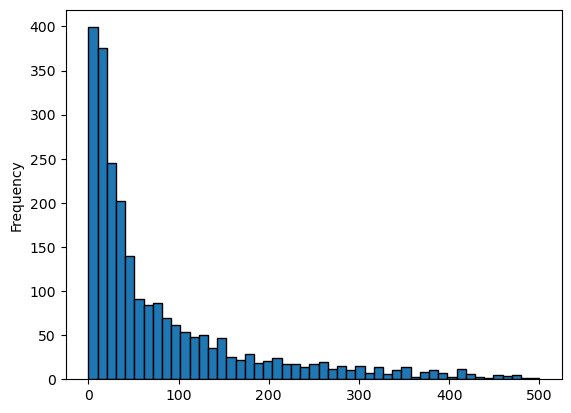

In [61]:
df_b_TN['review_count'].plot.hist(bins = np.linspace(0, 500, 50), edgecolor = 'black')
plt.show()

In [52]:
df_b_TN['review_count'].describe()

count    2509.000000
mean      127.208450
std       281.068826
min         5.000000
25%        16.000000
50%        43.000000
75%       126.000000
max      6093.000000
Name: review_count, dtype: float64

- on average, restaurants have 127 reviews, and median of 43 reviews

In [53]:
df_b_TN[df_b_TN['review_count'] == df_b_TN['review_count'].max()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,clean_cat
91757,GXFMD0Z4jEVZBCsbPf4CTQ,Hattie B’s Hot Chicken - Nashville,112 19th Ave S,Nashville,TN,37203,36.151387,-86.796603,4.5,6093,1,"{'RestaurantsGoodForGroups': 'True', 'Business...","American (Traditional), Chicken Shop, Southern...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-16:0', ...","American (New), American (Traditional), Chicke..."


- the restaurant with the most reviews at 6,093 is Hattie B's

#### Look into attributes column

In [67]:
df_b_TN['attributes'][9]

{'RestaurantsAttire': "'casual'",
 'RestaurantsGoodForGroups': 'False',
 'BusinessAcceptsCreditCards': 'True',
 'OutdoorSeating': 'True',
 'GoodForKids': 'True',
 'Alcohol': "u'none'",
 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}",
 'DogsAllowed': 'False',
 'RestaurantsTableService': 'False',
 'ByAppointmentOnly': 'False',
 'WiFi': "u'no'",
 'RestaurantsPriceRange2': '1',
 'RestaurantsReservations': 'False',
 'HasTV': 'True',
 'RestaurantsDelivery': 'True',
 'CoatCheck': 'False',
 'Caters': 'False',
 'RestaurantsTakeOut': 'True',
 'DriveThru': 'True',
 'HappyHour': 'False',
 'WheelchairAccessible': 'True'}

## 2. Checkins
Contains:

    **business_id**
    
    list of checkin data(yyyy-mm-dd hh:mm:ss)

In [8]:
checkin_json_path = '../data/yelp_academic_dataset_checkin.json'
df_c = pd.read_json(checkin_json_path, lines=True)
df_c

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


# 3. Reviews

Contains:
- **business_id**
- review_id
- **user_id**
- stars
- useful
- funny
- cool
- text
- **date**
- date(yyyy-mm-dd hh:mm:ss)

In [ ]:
review_json_path = '../data/yelp_academic_dataset_review.json'

chunks = []
for chunk in tqdm(pd.read_json(review_json_path, lines=True, chunksize = 100000)):
    chunks.append(chunk)
    
df_r = pd.concat(chunks, ignore_index = True)

In [ ]:
%%time
df_r.to_csv('../data/df_reviews.csv', index = False)

In [9]:
df_r = pd.read_csv('../data/df_reviews.csv')
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [69]:
df_r['text'][1]

"I've taken a lot of spin classes over the years, and nothing compares to the classes at Body Cycle. From the nice, clean space and amazing bikes, to the welcoming and motivating instructors, every class is a top notch work out.\n\nFor anyone who struggles to fit workouts in, the online scheduling system makes it easy to plan ahead (and there's no need to line up way in advanced like many gyms make you do).\n\nThere is no way I can write this review without giving Russell, the owner of Body Cycle, a shout out. Russell's passion for fitness and cycling is so evident, as is his desire for all of his clients to succeed. He is always dropping in to classes to check in/provide encouragement, and is open to ideas and recommendations from anyone. Russell always wears a smile on his face, even when he's kicking your butt in class!"

### Filtering for business_id in Nashville, TN  restaurant

In [70]:
nash_ids = df_b_TN['business_id'].tolist()

In [72]:
%%time
df_r_TN = df_r[df_r['business_id'].isin(nash_ids)]

CPU times: total: 5.94 s
Wall time: 24.6 s


In [82]:
df_r_TN.shape

(326356, 9)

In [74]:
df_r_TN.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
29,elqRpX9T3YwL07uLNtN3Bg,-sryo4gDYxbZ1T5Bz4l5Bw,ltBBYdNzkeKdCNPDAsxwAA,2,0,0,0,I at least have to give this restaurant two st...,2015-02-02 04:29:13
39,E9AB7V4z8xrt2uPF7T55FQ,iYY5Ii1LGpZCpXFkHlMefw,Zx7n8mdt8OzLRXVzolXNhQ,5,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21
43,qGQvUHmC02PAZW3H1WTIfw,RRTQpg8hutdimzAYuP_Hbw,eaJCpC6IhYphj7bwCDHTwQ,5,0,0,0,Stopped by after a Sunday morning walk in the ...,2015-08-30 13:41:47
63,67cGcRrS0jTvB8p7rpaPew,8YSxVaD203mE_9FR4nCEVA,oQ5CPRt0R3AzFvcjNOqB1w,3,1,0,0,Honestly the food doesn't knock my socks off b...,2016-01-17 13:26:19
82,DOeEDBfsrNph0ktNkYYFnQ,qVYilGRmY6uemAy_tDpfuA,9OtFX3YzG5keaUMOWU1imA,5,4,0,0,Man. This place is nice. The bartender was awe...,2014-05-26 01:56:19


# MERGING BUSINESS info(df_b_TN) and REVIEWS (df_r_TN)
- by **business_id**

In [79]:
%%time
df_br= pd.merge(df_b_TN, df_r_TN, how = 'right', on='business_id')

CPU times: total: 422 ms
Wall time: 446 ms


In [81]:
df_br.shape

(326356, 23)

In [86]:
df_br.head(2).T

,0,1
business_id,ltBBYdNzkeKdCNPDAsxwAA,Zx7n8mdt8OzLRXVzolXNhQ
name,Tavern,Milk and Honey Nashville
address,1904 Broadway,214 11th Ave S
city,Nashville,Nashville
state,TN,TN
postal_code,37203,37203
latitude,36.1509,36.154702
longitude,-86.797012,-86.784541
overall_stars,4.0,4.0
review_count,1222,1725


In [85]:
#rename stars column
df_br = df_br.rename(columns={'stars_x': 'overall_stars', 'stars_y': 'review_stars'})

# 4. Tip
Contains: 
- **user_id**
- **business_id**
- text
- **date**
- compliment_count

In [76]:
tip_json_path = '../data/yelp_academic_dataset_tip.json'
df_t = pd.read_json(tip_json_path, lines=True)
df_t

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


### also filter by nash_ids

In [77]:
%%time
df_t_TN = df_t[df_t['business_id'].isin(nash_ids)]

CPU times: total: 78.1 ms
Wall time: 86.2 ms


In [78]:
df_t_TN

,user_id,business_id,text,date,compliment_count
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
11,JsXhBw6MntzTJjH_Ue5udw,wLHodvVFLTgK3nl2XG8OCw,Very good will definitely be coming back!!,2017-03-23 22:01:41,0
17,kjFgyrCvmVVGSlgWzRXILw,ReX09lhufLTAx19krkltDA,Got the grilled chicken entree. It was delicio...,2013-06-10 20:18:41,0
104,t0t4XNPtitNdgJv9UbfJgQ,Y989Hsw30AYUMcyNjBz9iQ,Try the crispy duck confit!,2013-02-16 21:13:16,0
150,reXq5di2UzuqxYW8M5X_fQ,I2CxrvM0BGH1svfxqGGD2g,Went here by accident trying to get to a Bbq p...,2012-07-27 00:18:31,0
...,...,...,...,...,...
908826,19LYVNNldu3YqdYEqB0NvQ,1b5mnK8bMnnju_cvU65GqQ,East nasty was tasty! A bit of a line but well...,2018-06-28 16:54:38,0
908851,PPmibzxRMr_tnxU_0HbP2A,4YoVUmkpUBNtdYa804Wzvg,Amazing cocktails,2013-09-30 22:58:59,0
908873,zCXrIBe0LhylkQW_1VA0SA,GXFMD0Z4jEVZBCsbPf4CTQ,Excellent,2018-03-12 22:31:00,0
908879,UDaA2IhjcCe3IAmPGz8w1g,GXFMD0Z4jEVZBCsbPf4CTQ,Great food. Well worth the 90 minute wait.,2019-04-06 05:23:27,0


In [95]:
#does a user_id review the same business more than once?
df_t_TN.groupby(['user_id', 'business_id'])['text'].count().sort_values(ascending = False)

user_id                 business_id           
alF_72E35Q4bIsw5MXyZBQ  iCKF72z3fqRTF1vxdBZINQ    42
5Y5KbsI5buMcNh2hTFaRpA  dD2p903p8lU0IgXT3OFluA    41
                        cvHY1RTAPSoH94ysP2_eyQ    34
alF_72E35Q4bIsw5MXyZBQ  eWmcdBJPPQ_iSaNU8uIpFQ    25
njcXFGqIuSp-_joP42MhxA  ReX09lhufLTAx19krkltDA    24
                                                  ..
KvCfCrxRlLCjFk8APWxo_A  n5FS-R7aFxFSBeHfVCAuRQ     1
Kv9nod9Js5y_dgdeAdqxpA  Jzb2IQSwPfULWzdl9Bq5fg     1
Kud9HzG-fiO6cCrxSFWTQg  MbVLinePgICrhu9vgFJAcw     1
KuWinB-X5QpPyWHdAXFfJQ  C9K3579SJgLPp0oAOM29wg     1
zzsPf8xNW11nd0B6MZqfRw  xxx_0Ol7lbK0hVzv7x0-Yg     1
Name: text, Length: 33525, dtype: int64

In [98]:
df_t_TN.groupby(['user_id', 'business_id'])['date'].value_counts().sort_values(ascending = False)

user_id                 business_id             date               
FOwaVfeesQFeCvegblq6Pw  4nxjxYYN3hFDLNC67erEFQ  2011-10-14 13:26:53    2
XJcb75c9OY0xX8spM0TQuw  UlGS2NxZSiph33E3nfovRw  2013-08-04 16:43:08    2
elb6xgIS0KKpzWhXP7bI8g  wP2ok4O0GsR9td7Iiv1zKA  2017-10-03 18:29:18    1
ekdLfSd_saVzIMFd2gZuPQ  FJ3OEwJqi9AA_ZiCNnf_3g  2018-09-12 18:35:43    1
ekfE6S4tYxydHIIpecVa4g  xL0oeV9PSTC8HKZILwPKfg  2017-06-18 01:45:13    1
                                                                      ..
JtM1isV48Lu2KBcWRqiKaQ  AFk6UXFbH-idH31KhFQVCg  2018-07-31 13:35:49    1
                        DF_cgKLV_YMDkBaNlE0XoQ  2018-08-02 12:30:43    1
                        TKzt7jlAgLRJe4vzQje1bA  2018-08-01 14:10:26    1
                                                2018-09-05 13:05:40    1
zzsPf8xNW11nd0B6MZqfRw  xxx_0Ol7lbK0hVzv7x0-Yg  2015-12-20 00:17:20    1
Name: date, Length: 37906, dtype: int64

In [99]:
df_t_TN[(df_t_TN['user_id'] == 'alF_72E35Q4bIsw5MXyZBQ') 
       &
       (df_t_TN['business_id'] == 'iCKF72z3fqRTF1vxdBZINQ')]

,user_id,business_id,text,date,compliment_count
17877,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,Joe and Jamie holding the Pub down till 5. Hal...,2012-01-21 17:48:17,0
29366,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,"Joe, Jamie and Jarod serving green beer till 5...",2012-03-17 16:24:47,0
34502,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,Henry Calf Killer,2011-10-02 21:52:21,0
35941,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,Working...come have a cold one on a hot day!,2012-03-28 21:08:29,0
49014,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,"Happy hour till 7! Then, $1 off Yazoo beers al...",2012-02-02 22:25:50,0
61136,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,Happy hour!,2012-03-22 22:30:52,0
67495,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,Getting the vibe,2011-11-24 04:35:14,0
74948,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,$2.50 Mule drinks this week! Come enjoy on our...,2012-02-29 22:16:28,0
79468,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,Game time soon! Great spot for football w frie...,2011-01-23 19:21:17,0
81293,alF_72E35Q4bIsw5MXyZBQ,iCKF72z3fqRTF1vxdBZINQ,"It's Mule week at the Pub. No, it is a drink! ...",2011-11-21 21:58:20,0


# MERGE TO df_br matching by business_id, user_id, (date? if user rated restaurant more than once?)

In [105]:
df_t_TN = df_t_TN.rename(columns = {'text': 'tip'})

In [106]:
#test
test1 = pd.merge( df_br, df_t_TN, on = ['business_id', 'user_id'], how = 'left')

In [107]:
test1.shape

(329909, 26)

In [108]:
test1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,overall_stars,review_count,...,user_id,review_stars,useful,funny,cool,text,date_x,tip,date_y,compliment_count
0,ltBBYdNzkeKdCNPDAsxwAA,Tavern,1904 Broadway,Nashville,TN,37203,36.150900,-86.797012,4.0,1222,...,-sryo4gDYxbZ1T5Bz4l5Bw,2,0,0,0,I at least have to give this restaurant two st...,2015-02-02 04:29:13,NaN,NaT,NaN
1,Zx7n8mdt8OzLRXVzolXNhQ,Milk and Honey Nashville,214 11th Ave S,Nashville,TN,37203,36.154702,-86.784541,4.0,1725,...,iYY5Ii1LGpZCpXFkHlMefw,5,0,0,0,Amazing biscuits and (fill in the blank). Grea...,2018-04-27 23:03:21,NaN,NaT,NaN
2,eaJCpC6IhYphj7bwCDHTwQ,Three Brothers Coffee,2813 W End Ave,Nashville,TN,37203,36.144808,-86.812266,4.5,249,...,RRTQpg8hutdimzAYuP_Hbw,5,0,0,0,Stopped by after a Sunday morning walk in the ...,2015-08-30 13:41:47,Great vibe and great food\nCheck out the art,2017-01-20 14:25:14,0.0
3,oQ5CPRt0R3AzFvcjNOqB1w,Edley's Bar-B-Que - 12 South,2706 12th Ave S,Nashville,TN,37204,36.122973,-86.789782,4.0,1114,...,8YSxVaD203mE_9FR4nCEVA,3,1,0,0,Honestly the food doesn't knock my socks off b...,2016-01-17 13:26:19,NaN,NaT,NaN
4,9OtFX3YzG5keaUMOWU1imA,Champions,600 Marriott Drive,Nashville,TN,37214,36.146207,-86.693053,4.0,73,...,qVYilGRmY6uemAy_tDpfuA,5,4,0,0,Man. This place is nice. The bartender was awe...,2014-05-26 01:56:19,Very nice place. Great service. Cold beer,2014-05-26 01:28:58,0.0


In [109]:
test1.head(2).T

,0,1
business_id,ltBBYdNzkeKdCNPDAsxwAA,Zx7n8mdt8OzLRXVzolXNhQ
name,Tavern,Milk and Honey Nashville
address,1904 Broadway,214 11th Ave S
city,Nashville,Nashville
state,TN,TN
postal_code,37203,37203
latitude,36.1509,36.154702
longitude,-86.797012,-86.784541
overall_stars,4.0,4.0
review_count,1222,1725


In [110]:
df_t_TN['date'] = pd.to_datetime(df_t_TN['date'])
df_br['date'] = pd.to_datetime(df_br['date'])

In [111]:
test2 = pd.merge(df_t_TN, df_br, on = ['business_id', 'user_id', 'date'], how = 'right')

In [112]:
test2.shape

(326356, 25)

In [113]:
test2.head().T

,0,1,2,3,4
user_id,-sryo4gDYxbZ1T5Bz4l5Bw,iYY5Ii1LGpZCpXFkHlMefw,RRTQpg8hutdimzAYuP_Hbw,8YSxVaD203mE_9FR4nCEVA,qVYilGRmY6uemAy_tDpfuA
business_id,ltBBYdNzkeKdCNPDAsxwAA,Zx7n8mdt8OzLRXVzolXNhQ,eaJCpC6IhYphj7bwCDHTwQ,oQ5CPRt0R3AzFvcjNOqB1w,9OtFX3YzG5keaUMOWU1imA
tip,NaN,NaN,NaN,NaN,NaN
date,2015-02-02 04:29:13,2018-04-27 23:03:21,2015-08-30 13:41:47,2016-01-17 13:26:19,2014-05-26 01:56:19
compliment_count,NaN,NaN,NaN,NaN,NaN
name,Tavern,Milk and Honey Nashville,Three Brothers Coffee,Edley's Bar-B-Que - 12 South,Champions
address,1904 Broadway,214 11th Ave S,2813 W End Ave,2706 12th Ave S,600 Marriott Drive
city,Nashville,Nashville,Nashville,Nashville,Nashville
state,TN,TN,TN,TN,TN
postal_code,37203,37203,37203,37204,37214


In [115]:
test2['tip'].value_counts()

Series([], Name: tip, dtype: int64)

# 5. User
- **user_id**
- name
- review_count
- yelping_since (date)
- useful
- funny
- cool
- elite(list of years)
- friends
- fans
- compliment(more, profile, cute, list, note, plain, funny, writer, photos)

In [8]:
user_json_path = '../data/yelp_academic_dataset_user.json'

chunks = []
for chunk in tqdm(pd.read_json(user_json_path, lines=True, chunksize = 100000)):
    chunks.append(chunk)
    
df_u = pd.concat(chunks, ignore_index = True)

0it [00:00, ?it/s]

In [9]:
%%time
df_u.to_csv('../data/df_user.csv', index = False)

CPU times: total: 1min 10s
Wall time: 1min 14s


In [10]:
df_u.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
